# Scatter plot game

Matplotlib is building the font cache; this may take a moment.


Welcome to the Scatter Plot Game!
Press ESC at any time to exit the game
Try to guess the coordinates of the red point.
You'll play 3 rounds.

Round 1


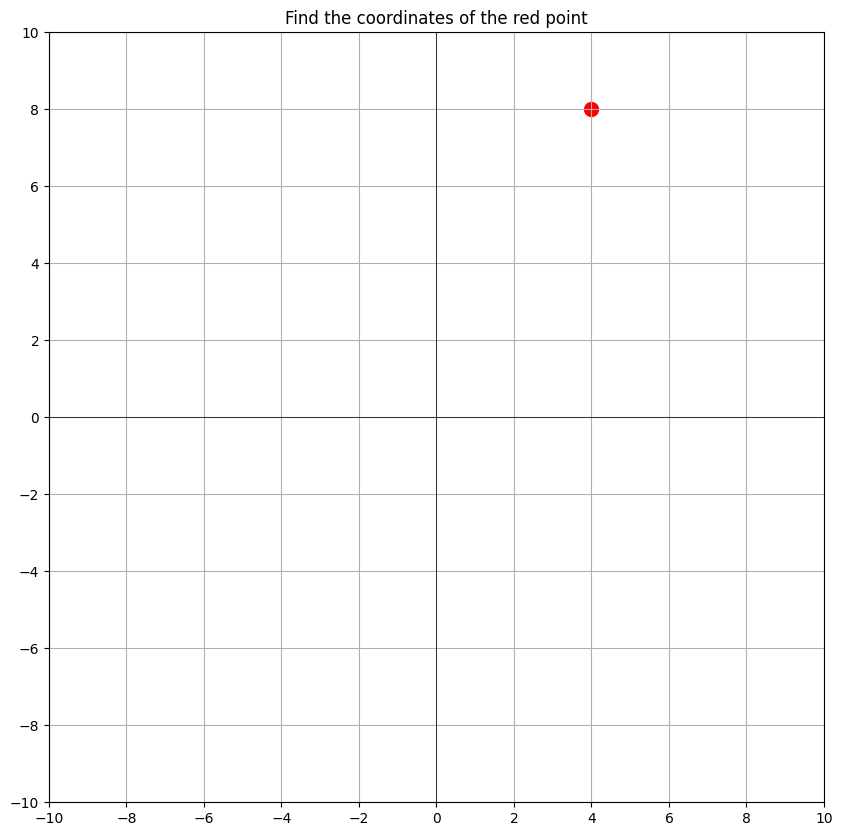

Wrong! The point was at (4, 8)
Better luck next time!

Round 2


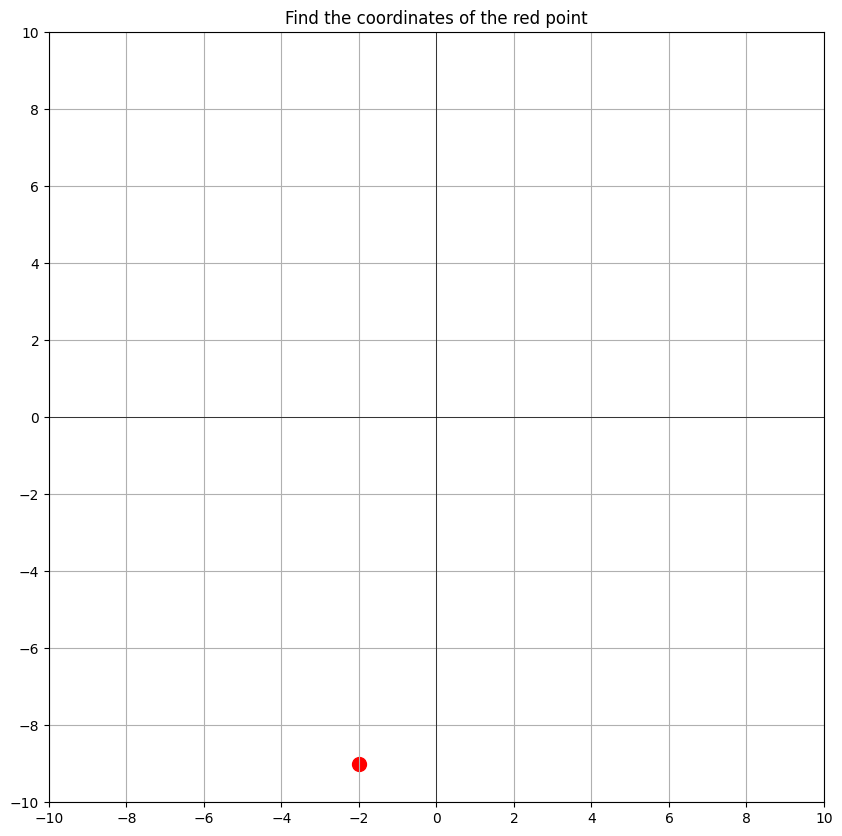

Invalid input. Please enter valid integers.
Better luck next time!

Round 3


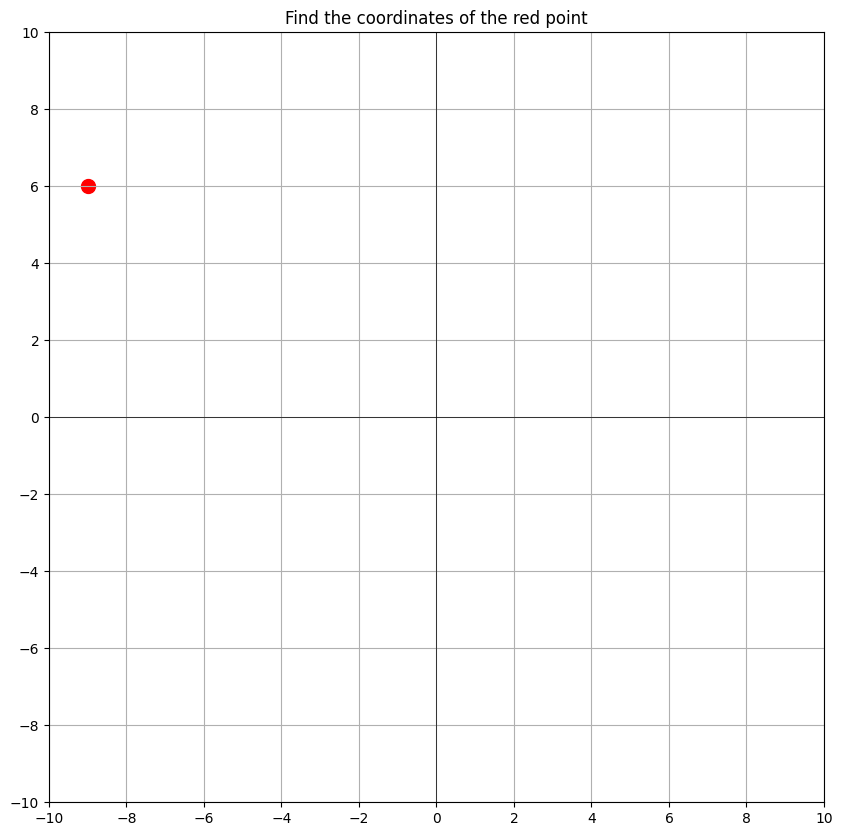

Wrong! The point was at (-9, 6)
Better luck next time!

Game Over!
Your final score: 0 out of 3


In [1]:
import matplotlib.pyplot as plt
import numpy as np
import random

def on_key(event):
    if event.key == 'escape':
        plt.close('all')
        print("\nGoodbye! See you soon! 👋")
        exit()

def scatter_plot_game():
    # Set up the plot with larger dimensions
    plt.figure(figsize=(10, 10))
    plt.grid(True)
    plt.axhline(y=0, color='k', linestyle='-', linewidth=0.5)
    plt.axvline(x=0, color='k', linestyle='-', linewidth=0.5)

    # Add linspace to the axes
    x_values = np.linspace(-10, 10, 11)
    y_values = np.linspace(-10, 10, 11)
    plt.xticks(x_values)
    plt.yticks(y_values)
        
    # Generate random point
    x = random.randint(-10, 10)
    y = random.randint(-10, 10)
    
    # Plot the point
    plt.scatter(x, y, color='red', s=100)
    plt.xlim(-10, 10)
    plt.ylim(-10, 10)
    
    # Show plot without the point coordinates
    plt.title("Find the coordinates of the red point")
    plt.show()

    # Get player's guess
    try:
        guess_x = int(input("Enter the x-coordinate: "))
        guess_y = int(input("Enter the y-coordinate: "))
    except ValueError:
        print("Invalid input. Please enter valid integers.")
        return False

    # Check if correct
    if guess_x == x and guess_y == y:
        print("Correct! The point was at ({}, {})".format(x, y))
        return True
    else:
        print("Wrong! The point was at ({}, {})".format(x, y))
        return False

def play_game():
    score = 0
    rounds = 3
    
    print("Welcome to the Scatter Plot Game!")
    print("Press ESC at any time to exit the game")
    print("Try to guess the coordinates of the red point.")
    print("You'll play", rounds, "rounds.")
    
    for round in range(rounds):
        print("\nRound", round + 1)
        if scatter_plot_game():
            score += 1
        else:
            print("Better luck next time!")
            
    print("\nGame Over!")
    print("Your final score:", score, "out of", rounds)

# Run the game
play_game()


# Algebra practice game

In [2]:
import random

def generate_one_step():
    # Generate random numbers for one-step equations
    a = random.randint(-20, 20)
    b = random.randint(-50, 50)
    # Ensure a is not zero
    while a == 0:
        a = random.randint(-20, 20)
    
    answer = b / a
    return f"{a}x = {b}", answer

def generate_two_step():
    # Generate random numbers for two-step equations
    a = random.randint(-15, 15)
    b = random.randint(-30, 30)
    c = random.randint(-100, 100)
    # Ensure a is not zero
    while a == 0:
        a = random.randint(-15, 15)
    
    answer = (c - b) / a
    return f"{a}x + {b} = {c}", answer

def play_algebra_game():
    score = 0
    total_questions = 5
    
    print("Welcome to Algebra Practice Game!")
    print("Solve the equations. Enter your answer as a decimal number.")
    
    for i in range(total_questions):
        # Randomly choose between one-step and two-step equations
        if random.choice([True, False]):
            equation, correct_answer = generate_one_step()
        else:
            equation, correct_answer = generate_two_step()
            
        print(f"\nQuestion {i+1}: Solve for x in {equation}")
        
        try:
            user_answer = float(input("Your answer: "))
            # Check if answer is correct within a small margin of error
            if abs(user_answer - correct_answer) < 0.01:
                print("Correct!")
                score += 1
            else:
                print(f"Wrong! The correct answer was {correct_answer:.2f}")
        except ValueError:
            print("Please enter a valid number!")
    
    print(f"\nGame Over! Your score: {score}/{total_questions}")
    return score

# Run the game
if __name__ == "__main__":
    while True:
        play_algebra_game()
        play_again = input("\nWould you like to play again? (yes/no): ").lower()
        if play_again != 'yes':
            print("Thanks for playing!")
            break


Welcome to Algebra Practice Game!
Solve the equations. Enter your answer as a decimal number.

Question 1: Solve for x in -18x = -33
Wrong! The correct answer was 1.83

Question 2: Solve for x in 7x + 23 = 47
Wrong! The correct answer was 3.43

Question 3: Solve for x in 7x + 20 = -55
Wrong! The correct answer was -10.71

Question 4: Solve for x in -9x + 2 = 81
Wrong! The correct answer was -8.78

Question 5: Solve for x in 2x = -7
Please enter a valid number!

Game Over! Your score: 0/5
Thanks for playing!


# Projectile game

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact
import ipywidgets as widgets
from IPython.display import display, clear_output
import random

class ProjectileGame:
    def __init__(self):
        self.running = True
        self.reset_game()
        
    def reset_game(self):
        self.wall_height = random.randint(3, 8)
        self.wall_x = random.randint(5, 12)
        
    def plot_trajectory(self, a, b, c):
        if not self.running:
            return
            
        plt.clf()
        x = np.linspace(0, 15, 100)
        y = a*x**2 + b*x + c
        
        fig, ax = plt.subplots(figsize=(10, 6))
        ax.grid(True)
        ax.axhline(y=0, color='k', linestyle='-')
        ax.axvline(x=0, color='k', linestyle='-')
        
        ax.plot([self.wall_x, self.wall_x], [0, self.wall_height], 'r-', linewidth=3)
        ax.plot(x, y, 'b-')
        
        ax.set_xlim(0, 15)
        ax.set_ylim(0, 10)
        ax.set_title('Level 1 - Clear the Wall!')
        plt.close()
        display(fig)
        
        wall_y = a*self.wall_x**2 + b*self.wall_x + c
        if wall_y > self.wall_height:
            print("¡Éxito! Has superado el muro.")
            if self.running:
                self.reset_game()
                self.play_level1()
        else:
            print("Inténtalo de nuevo. La trayectoria golpea el muro.")

    def play_level1(self):
        if not self.running:
            return
            
        print(f"Posición del muro: x = {self.wall_x}, altura = {self.wall_height}")
        
        controls = {
            'a': widgets.FloatSlider(
                value=-0.5,
                min=-1.0,
                max=0.0,
                step=0.1,
                description='a:',
                continuous_update=False
            ),
            'b': widgets.FloatSlider(
                value=2.5,
                min=0.0,
                max=5.0,
                step=0.1,
                description='b:',
                continuous_update=False
            ),
            'c': widgets.FloatSlider(
                value=0.0,
                min=0.0,
                max=5.0,
                step=0.1,
                description='c:',
                continuous_update=False
            )
        }
        
        interactive_plot = widgets.interactive(
            self.plot_trajectory,
            **controls
        )
        display(interactive_plot)

game = ProjectileGame()
game.play_level1()


Posición del muro: x = 9, altura = 4


interactive(children=(FloatSlider(value=-0.5, continuous_update=False, description='a:', max=0.0, min=-1.0), F…